# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `6` | `Questions`

> Hi, Team 👋

> The purpose of the current exercise problem sets is to consolidate and expand the understanding of algorithmic trading tool kits that you have developed in the course.

> Building on what you have learned thus far, these problem sets will ask you to create trading strategies, capitalizing on commonly used technical indicators.

> Please submit your answers via the submission portal at eLearn. Again, it would be a good practice to attempt to answer these questions within the designated time limit.

> As with the previous exercise problem sets, the questions are written in such a way that helps advance your learning, rather than testing you.

> Enjoy🤞

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

> Let's set some print option.

In [2]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

## 👇 Questions 1 to 4 ask you to build, execute, and backtest a strategy based on one kind of momentum strategy called the `Moving Average Convergence Divergence` (MACD) crossover.

### <font color = blue> 👉 Question 1</font>. Let’s take a look at Apple (AAPL) as our security of interest, over the three-year period of 2015 through 2017.

#### Moving Average Convergence Divergence (`MACD`) is a lagging, trend-following momentum indicator reflecting the relationship between two moving averages of stock prices.

#### The strategy utilizes two indicators, the MACD and the MACD signal line:

- The MACD is defined as the `difference` between the `12`-day ***exponential*** moving average and the `26`-day exponential moving average.
- The MACD signal line is then defined as the `9`-day ***exponential*** moving average of the MACD.

### <font color = green> NOTE: The MACD crossover strategy is defined as:

- A `bullish` crossover arises when the MACD line turns `upward and crosses` beyond the MACD signal line.
- A `bearish` crossover arises when the MACD line turns `downward and crosses` under the MACD signal line.

### Visualize your buy and sell positions.

## Presenting alternative solution using `Class`

<a id='Class and Object'></a>

# Recall: Class and Object

Almost everything in Python is an <i>object</i> with <i>properties (attributes)</i> and <i>methods</i>.<br>

<img src="IMG/class_and_object.png" alt="Drawing" style="width: 800px;"/>

- Class: the Blueprint, a general layout for objects under the same category - e.g. a blueprint of vehicles
- Object: A specific instance of a class - e.g. a taxi, a bus
- Attributes: Properties of an Object - e.g. wheels, windshield, doors, pedals
- Methods: Functionalities of the object - e.g. accelerate, brake, signaling

### Why create a class for the trading strategy?

One can encapsultate key information and functionality required for a process and bundle them as a "package".<br>

| | |
|---|---|
|__Key information needed__| ticker, historical price data, trading signals,<br> trades and positions, performance and drawdown|
|__Key functionalities needed__| get data, generate trading signals,<br> run strategy, analyze and visualize performance|


### The blueprint of our MACD trading machine

| Step | Description | Class/ Method call | Attributes created |
| :-- | :-- | :-- | :-- |
| 1. | Initialize the object | `trade_apple = MACD_momentum_strategy('AAPL', start, end)`<br> `MACD_momentum_strategy.__init__()` | `trade_apple.ticker` (str)<br>`trade_apple.df[['Close']]` (pd.DataFrame)<br>`trade_apple.trade_days` (int)
| 2. | Generate MACD & MACD Signal | `trade_apple.set_MACD(fast = 12, slow = 26, signal = 9)`| `trade_apple.fast_MACD` (int)<br>`trade_apple.slow_MACD` (int)<br> `trade_apple.df\`<br>`[['MACD','MACD_Signal']]` (pd.DataFrame)|
| 3.A. | Run strategy | `trade_apple.run_strategy(trade_at_start = False)`<br>`trade_at_start = False`: start trade after N = `fast` days| `trade_apple.df['Position']` (pd.Series)<br>`trade_apple.df['Trades']` (pd.Series)<br>`trade_apple.df['Returns']` (pd.Series)<br>`trade_apple.df['Strategy']` (pd.Series)<br>`trade_apple.df['Buy_Hold']` (pd.Series)<br>`trade_apple.df['Gross_Cum_Performance']` (pd.Series)<br> |
| 3.B. | Plot strategy | `trade_apple.plot_strategy()`<br>Produces 4 panels of charts<br>1. Closing prices, EWM lines<br>2. MACD and MACD Signals<br>3. Strategy vs Long-only<br>4. Position Holding| No attribute generated|
| 4. | Add transaction cost| `trade_apple.add_transaction_cost()`<br>Params:<br>1. `initial_capital` (default `100000`)<br>2. `commission` (default `5` per trade)<br>3. `Verbose` (default `False`; print summary if `True`|`trade_apple.df_w_cost['Position']`<br>`trade_apple.df_w_cost['Trades']`<br>`trade_apple.df_w_cost['Gross_Cum_Performance']`<br>`trade_apple.df_w_cost['Commission_paid']`<br>`trade_apple.df_w_cost['Capital']`<br>`trade_apple.df_w_cost['Net_Cum_Performance']`<br>|
| 5.A. | Analyze Drawdowns| `trade_apple.analyze_drawdown()`<br>Params:<br>1. `sort` (Default `None`; if `None`, sort by MDD<br>2. `net` (Default `False`; net or gross cum perf.<br>3. `plot` (Default `True`)<br>4. `verbose` (Default `True`) |`trade_apple.drawdowns` (pd.DataFrame)|
|5.B| Plot Drawdowns <br> (Only when triggered)|`trade_apple.analyze_drawdown(plot = True)`<br>`trade_apple.__plot_drawdown__()`| No attribute generated|

>Note: within the class, anything that is not assigned to a `self.variable_name` is neither an attribute nor a method. They are `local` variables that will not be saved after a method is executed.

### Below are the lines of code that lead to an answer:

In [3]:
class MACD_momentum_strategy:
    """
    A class for implementing and analyzing a MACD momentum trading strategy.

    Args:
        ticker (str): The stock ticker symbol.
        start (str): The start date for historical data (YYYY-MM-DD).
        end (str): The end date for historical data (YYYY-MM-DD).

    Attributes:
        ticker (str): The stock ticker symbol.
        df (DataFrame): DataFrame containing historical stock data.
        trade_days (int): Number of trade days in the data.
        fast_MACD (int): Fast EMA period for MACD calculation.
        slow_MACD (int): Slow EMA period for MACD calculation.
        df_w_cost (DataFrame): DataFrame containing strategy performance with transaction costs.
        drawdowns (DataFrame): DataFrame containing drawdown information.
    """
    def __init__(self, ticker, start, end):
        """
        Initialize the MACD_momentum_strategy object.

        Args:
            ticker (str): The stock ticker symbol.
            start (str): The start date for historical data (YYYY-MM-DD).
            end (str): The end date for historical data (YYYY-MM-DD).
        """
        self.ticker = ticker
        
        # Extract data from yahoo finance
        data =\
        (
            yf
            .download(
                ticker,
                start = start,
                end = end
            )
        )
        
        self.df = data[['Close']]
        self.trade_days = data.shape[0]
        
    def set_MACD(self, fast = 12, slow = 26, signal = 9):
        """
        Set MACD parameters and calculate MACD and MACD Signal.

        Args:
            fast (int): Fast EMA period for MACD calculation (default: 12).
            slow (int): Slow EMA period for MACD calculation (default: 26).
            signal (int): Signal EMA period for MACD calculation (default: 9).
        """
        # Save information on the `fast` and `slow` parameters for use later
        self.fast_MACD = fast
        self.slow_MACD = slow
        
        # Generate `fast` EWMA
        self.df[f'{fast}D_EMA'] =\
        (
            self.df['Close']
            .ewm(span = fast)
            .mean()
        )
        
        # Generate `slow` EWMA
        self.df[f'{slow}D_EMA'] =\
        (
            self.df['Close']
            .ewm(span = slow)
            .mean()
        )
        
        # Generate `MACD` line
        self.df['MACD'] =\
        (
            self.df[f'{fast}D_EMA']
            - self.df[f'{slow}D_EMA']
        )
        
        # Generate `MACD` signal
        self.df['MACD_Signal'] =\
        (
            self.df['MACD']
            .ewm(span = signal)
            .mean()
        )
        
    def run_strategy(self, trade_at_start = False):
        """
        Run the MACD momentum trading strategy.

        Args:
            trade_at_start (bool): True to initiate trades from the start, 
                                   False to wait for MACD signals (default: False).
        """
        
        # Determine start of trading day
        start = 0 if trade_at_start else self.fast_MACD
        
        # Initialize `Position` column with NaN values
        self.df['Position'] = np.nan
        
        # Identify days to hold long positions
        self.df.iloc[start:]['Position'] =\
        (
            np
            .where(
                self.df.iloc[start:]['MACD']
                > self.df.iloc[start:]['MACD_Signal'],
                1, np.nan
            )
        )

        # Identify days to hold short positions
        self.df.iloc[start:]['Position'] =\
        (
            np
            .where(
                self.df.iloc[start:]['MACD']
                < self.df.iloc[start:]['MACD_Signal'],
                -1, self.df.iloc[start:]['Position']
            )
        )
        
        # Fill all empty positions by '0'
        self.df['Position'] =\
        (
            self.df['Position'] 
            .fillna(0)
        )
        
        # Determine trades (when switching of positions happens)
        self.df['Trades'] =\
        (
            self.df['Position']
            .diff()
        )
        
        # Remove any empty row
        self.df =\
        (
            self.df
            .dropna()
        )
        
        # Calculate daily returns on the stock (long-only)
        self.df['Returns'] =\
        (
            self.df['Close']
            .pct_change()
        )
        
        # Calculate daily returns on the strategy
        self.df['Strategy'] =\
        (
            self.df['Position']
            .shift(1)
            * self.df['Returns']
        )
        
        # Calculate cumulative performance on the long-only (base) strategy
        self.df['Buy_Hold'] =\
        (
            self.df['Close']
            / self.df['Close'].iloc[0]
        )
        
        # Calculate gross (ex-comm) performance on our MACD momentum strategy
        self.df['Gross_Cum_Performance'] =\
        (
            (self.df['Strategy'] + 1)
            .cumprod()
            .bfill()
        )
        
    def add_transaction_cost(self, initial_capital = 100000, commission = 5, verbose = False):
        """
        Add transaction costs to strategy performance.

        Args:
            initial_capital (float): Initial capital for the trading strategy (default: 100000).
            commission (float): Transaction commission cost (default: 5).
            verbose (bool): True to print performance summary (default: False).
        """
        # Create a copy of our original df as a new dataframe for cost analysis
        # .copy() to ensure both dfs are not linked
        self.df_w_cost =\
        (
            self.df[
                ['Position', 
                 'Trades', 
                 'Gross_Cum_Performance']
            ].copy()
        )
        
        # Populate commissions paid 
        # For each long to short, we consider 2x commissions to be paid:
        ## 1x for closing of existing position
        ## 1x for opening new position in the opposite direction
        
        self.df_w_cost['Commission_paid'] =\
        (
            np.abs(self.df_w_cost['Trades'])
            * commission
        ).cumsum()
        
        # Calculate capital - we assume that we can trade in fractional shares (Naive)
        self.df_w_cost['Capital'] =\
        (
            self.df_w_cost['Gross_Cum_Performance']
            * initial_capital
            - self.df_w_cost['Commission_paid']
        )
        
        # Caculate net performance - Gross less commission
        
        self.df_w_cost['Net_Cum_Performance'] =\
        (
            self.df_w_cost['Capital']
            / self.df_w_cost['Capital'].iloc[0]
        )
        
        # Verbose - if we wish to generate the below summary statements
        if verbose:
            print(f'Strategy Performance based on initial capital of ${initial_capital:,.2f} and commission of ${commission:,.2f}')
            print('================================================================================================')
            print(f'Strategy Gross Cumulative Performance: {self.df_w_cost["Gross_Cum_Performance"].iloc[-1]:.2%}')
            print(f'Strategy Net Cumulative Performance: {self.df_w_cost["Net_Cum_Performance"].iloc[-1]:.2%}')
        
    def plot_strategy(self):
        """
        Plot various aspects of the trading strategy.
        """
        fig = plt.figure(constrained_layout=True, figsize = (16,9))
        gs = fig.add_gridspec(3, 2)
        ax1 = fig.add_subplot(gs[:2, 0])
        ax2 = fig.add_subplot(gs[2, 0], sharex = ax1)
        ax3 = fig.add_subplot(gs[:2, 1])
        ax4 = fig.add_subplot(gs[2, 1], sharex = ax3)
        
        # Plot 1 - Close price, EWMA lines
        self.df[['Close', f'{self.fast_MACD}D_EMA', f'{self.slow_MACD}D_EMA']]\
            .plot(ax = ax1,
                 color = ['grey', 'y', 'm'])
        (
            ax1
            .plot(
                self.df.loc[self.df['Trades'] > 0].index,
                self.df.loc[self.df['Trades'] > 0, 'Close'],
                'g^',
                markersize = 6
            )
        )

        (
            ax1
            .plot(
                self.df.loc[self.df['Trades'] < 0].index,
                self.df.loc[self.df['Trades'] < 0, 'Close'],
                'rv',
                markersize = 6
            )
        )
        ax1.set_ylabel('Price')
        ax1.set_title(f'Closing Price of {self.ticker} and EWM Lines')
        ax1.legend(fontsize= '10')
        
        # Plot 2: MACD line and signal
        self.df[['MACD', 'MACD_Signal']].plot(ax = ax2)
        (
            ax2
            .plot(
                self.df.loc[self.df['Trades'] > 0].index,
                self.df.loc[self.df['Trades'] > 0, 'MACD'],
                'g^',
                markersize = 6
            )
        )
        (
            ax2
            .plot(
                self.df.loc[self.df['Trades'] < 0].index,
                self.df.loc[self.df['Trades'] < 0, 'MACD'],
                'rv',
                markersize = 6
            )
        )
        ax2.set_ylabel('MACD Level')
        ax2.set_title('MACD and MACD Signal')
        ax2.legend(fontsize= '10')
        
        # Plot 3: Gross Performance (Strategy) vs Buy-and-Hold (Base)
        self.df[['Gross_Cum_Performance', 'Buy_Hold']]\
            .plot(ax = ax3,
                 color = ['b', 'grey'])
        
        ax3.set_ylabel('Cumulative Performance')
        ax3.set_title('Compare Strategy vs Long-Only')
        ax3.legend(fontsize= '10')
        
        # Plot 4: Summary of position holding
        self.df['Position'].plot(ax = ax4, c = 'b')
        ax4.set_ylabel('Position')
        ax4.set_title('Position Holding')
        
        plt.show()
        
    def analyze_drawdown(self, sort = None, net = False, plot = True, verbose = True):
        """
        Analyze drawdowns in strategy performance.

        Args:
            sort (str): Column to sort the drawdowns by (default: None).
            net (bool): True to analyze net performance drawdowns, False for gross performance (default: False).
            plot (bool): True to plot drawdowns, False to skip plotting (default: True).
            verbose (bool): True to print drawdown summary (default: True).
        """
        # Determine if we want to run on Net performance or Gross performance
        performance = 'Net_Cum_Performance' if net else 'Gross_Cum_Performance'
        
        # Initialize a private attribute
        self.__df_drawdown__ =\
        (
            self.df_w_cost[[performance]]
                .copy()
        )
        
        # Identify watermark (the cumulative max performance since start of trading)
        self.__df_drawdown__['Watermark'] =\
        (
            self.__df_drawdown__[performance]
            .cummax()
        )
        
        # Identify drawdown (diffeence between cum. max. and current performance level)
        self.__df_drawdown__['Drawdown'] =\
        (
            self.__df_drawdown__['Watermark']
            - self.__df_drawdown__[performance]
        )
        
        # Identify points where breakeven occurs (i.e. drawdown == 0)
        breakeven_pts =\
        (self.__df_drawdown__['Drawdown']
            .loc[self.__df_drawdown__['Drawdown'] == 0]
            .index)
        
        # Determine if the latest period is still "underwater"
        if (self.__df_drawdown__[performance].iloc[-1] 
            < self.__df_drawdown__['Watermark'].iloc[-1]):
            # triggers if currently we are still underwater
            # add latest date into the breakeven_pts if still underwater (to account of current drawdown period)
            breakeven_pts = breakeven_pts.append(self.__df_drawdown__.tail(1).index)
            
        # Caculate drawdown periods
        drawdown_periods =\
        (
            breakeven_pts[1:].to_pydatetime()
            - breakeven_pts[:-1].to_pydatetime()
        )
        
        # Create a list to contain all dictionaries of each drawdown
        self.drawdowns = []
        
        for i in range(drawdown_periods.shape[0]):
            # Iterate through each drawdown periods
            start = breakeven_pts[i] # start of the ith drawdown
            end = breakeven_pts[i+1] # end of the ith drawdown
            
            # Calculate the max drawdown of the given period
            max_drawdown =\
            self.__df_drawdown__['Drawdown']\
            .loc[start:end]\
            .max()\
            
            # Save information in the list initiated
            self.drawdowns\
            .append({'start_date': start, 
                     'end_date': end, 
                     'drawdown_period':drawdown_periods[i], 
                     'max_drawdown': max_drawdown})
        
        # Convert list of dict into a dataframe
        self.drawdowns =\
            pd\
            .DataFrame(
                self.drawdowns
            )\
            .sort_values(by = sort if sort else 'max_drawdown',
                        ascending = False)\
            .reset_index(drop = True)
        
        # if plotting is selected, we shall visualize the drawdown periods
        if plot:
            self.__plot_drawdown__()
        
    def __plot_drawdown__(self):
        """
        Plot drawdowns in strategy performance.
        """
        
        fig, ax =\
            plt.subplots(1, figsize = (16,10))
        
        # Plot the watermark and the strategy performance
        (
            self.__df_drawdown__
            .iloc[:,:2]
            .plot(color = ['green', 'blue'],
                 style = ['-', '--'],
                 ax = ax)
        )
        
        for i in range(5):
            # Plot each of the top 5 drawdown period, in different colors
            start = self.drawdowns.iloc[i]['start_date']
            end = self.drawdowns.iloc[i]['end_date'] + dt.timedelta(days = 1)
            days = self.drawdowns.iloc[i]['drawdown_period']
            
            self.__df_drawdown__.loc[start:end]['Watermark'].plot(ax = ax,
                                                             label = f'Drawdown period = {days}')
        
        
        
        ax.legend()
        plt.show()
        

In [4]:
help(MACD_momentum_strategy)

Help on class MACD_momentum_strategy in module __main__:

class MACD_momentum_strategy(builtins.object)
 |  MACD_momentum_strategy(ticker, start, end)
 |  
 |  A class for implementing and analyzing a MACD momentum trading strategy.
 |  
 |  Args:
 |      ticker (str): The stock ticker symbol.
 |      start (str): The start date for historical data (YYYY-MM-DD).
 |      end (str): The end date for historical data (YYYY-MM-DD).
 |  
 |  Attributes:
 |      ticker (str): The stock ticker symbol.
 |      df (DataFrame): DataFrame containing historical stock data.
 |      trade_days (int): Number of trade days in the data.
 |      fast_MACD (int): Fast EMA period for MACD calculation.
 |      slow_MACD (int): Slow EMA period for MACD calculation.
 |      df_w_cost (DataFrame): DataFrame containing strategy performance with transaction costs.
 |      drawdowns (DataFrame): DataFrame containing drawdown information.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, ticker, start, end)
 

#### Show the public methods available in the class `MACD_momentum_strategy`

In [5]:
[name for name in dir(MACD_momentum_strategy) if not name.startswith('_')]

['add_transaction_cost',
 'analyze_drawdown',
 'plot_strategy',
 'run_strategy',
 'set_MACD']

#### Start of process

In [6]:
ticker = 'AAPL'
start = '2015-01-01'
end = '2017-12-31'

In [7]:
trade_apple = MACD_momentum_strategy(ticker, start, end)
trade_apple.set_MACD(fast = 12, slow = 26, signal = 9)
trade_apple.run_strategy()

[*********************100%***********************]  1 of 1 completed


### <font color = red> Answer 1 is presented in the cell below: </font>

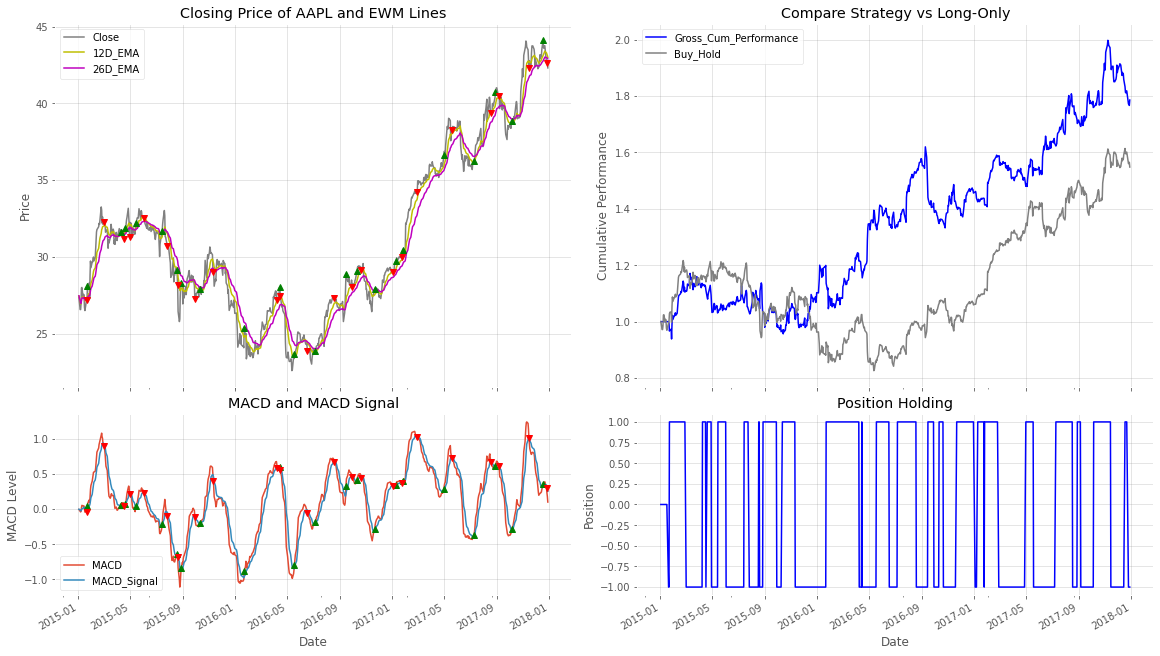

In [8]:
trade_apple.plot_strategy()

### <font color = blue> 👉 Question 2</font>. Let’s suppose that you started from a $100,000 capital base for the given security.

### Given a $5 fixed commission fee per trade, how much in cumulative returns could you have had as a result of the MACD crossover strategy?

### Below are the lines of code that lead to an answer:

In [9]:
trade_apple.add_transaction_cost(initial_capital = 100000, commission = 5, verbose = True)

Strategy Performance based on initial capital of $100,000.00 and commission of $5.00
Strategy Gross Cumulative Performance: 178.54%
Strategy Net Cumulative Performance: 178.09%


In [10]:
trade_apple.df.head(5)

,Close,12D_EMA,26D_EMA,MACD,MACD_Signal,Position,Trades,Returns,Strategy,Buy_Hold,Gross_Cum_Performance
Date,,,,,,,,,,,
2015-01-02,27.332500,27.452812,27.458702,-0.005889,-0.003272,0.0,0.0,NaN,NaN,1.000000,1.0
2015-01-05,26.562500,27.105323,27.136705,-0.031382,-0.014792,0.0,0.0,-0.028172,-0.0,0.971828,1.0
2015-01-06,26.565001,26.934765,26.976882,-0.042117,-0.024049,0.0,0.0,0.000094,0.0,0.971920,1.0
2015-01-07,26.937500,26.935508,26.967749,-0.032241,-0.026486,0.0,0.0,0.014022,0.0,0.985548,1.0
2015-01-08,27.972500,27.187551,27.168992,0.018559,-0.014276,0.0,0.0,0.038422,0.0,1.023415,1.0


In [11]:
trade_apple.df_w_cost.tail(5)

,Position,Trades,Gross_Cum_Performance,Commission_paid,Capital,Net_Cum_Performance
Date,,,,,,
2017-12-22,1.0,0.0,1.817706,435.0,181335.583683,1.813356
2017-12-26,-1.0,-2.0,1.771591,445.0,176714.080985,1.767141
2017-12-27,-1.0,0.0,1.771279,445.0,176682.923361,1.766829
2017-12-28,-1.0,0.0,1.766296,445.0,176184.560856,1.761846
2017-12-29,-1.0,0.0,1.785396,445.0,178094.578170,1.780946


### <font color = red> Answer 2 </font>

    The answer is 178.09 % .

### <font color = blue> 👉 Question 3</font>. Now please find the `five` worst drawdown periods over the investment horizon and provide their net drawdown in % and duration, respectively.

### <font color = green> The question asks you to find the five worst drawdown periods, beyond identifying max drawdown (MDD).

### Below are the lines of code that lead to an answer:

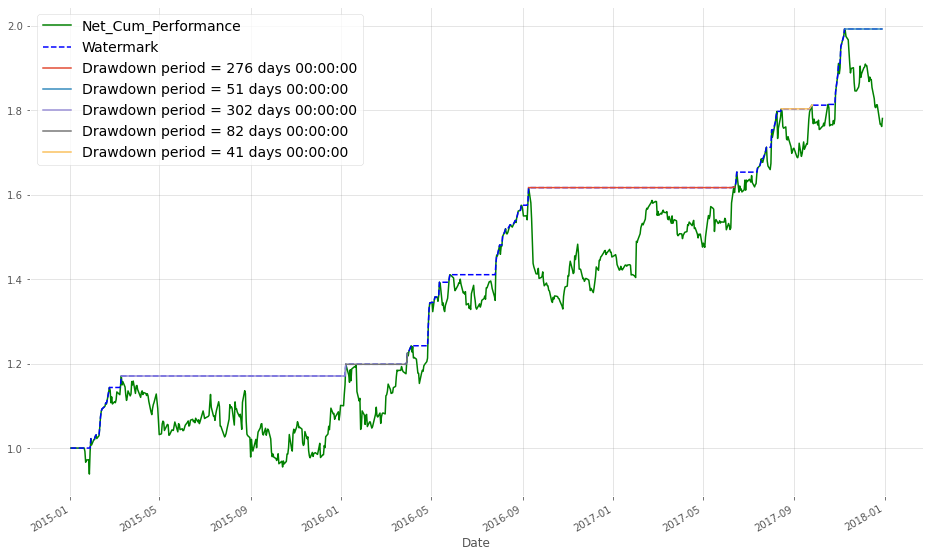

In [12]:
trade_apple.analyze_drawdown(net = True)

In [13]:
trade_apple.drawdowns.head()

,start_date,end_date,drawdown_period,max_drawdown
0,2016-09-09,2017-06-12,276 days,0.287668
1,2017-11-08,2017-12-29,51 days,0.231119
2,2015-03-11,2016-01-07,302 days,0.215610
3,2016-01-07,2016-03-29,82 days,0.154286
4,2017-08-15,2017-09-25,41 days,0.115939


### <font color = red> Answer 3 </font>

    The Worst drawdown period     : Net drawdown 28.7% | Duration 276 Days
    
    The 2nd worst drawdown period : Net drawdown 23.1% | Duration 51 Days
     
    The 3rd worst drawdown period : Net drawdown 21.6% | Duration 302 Days
         
    The 4th worst drawdown period : Net drawdown 15.4% | Duration 82 Days
    
    The 5th worst drawdown period : Net drawdown 11.6% | Duration 41 Days

### <font color = blue> 👉 Question 4</font>. Within the investment horizon, please calculate annual returns for each of the three years and then find the year that performs better than average vs. less than average annual returns.

### Below are the lines of code that lead to an answer:

In [14]:
# iterate through each year
for year in range(2015, 2018):
    # instantiate a temporary df for records in `year`
    sub_df =\
    (
        trade_apple
        .df_w_cost.loc[trade_apple
                       .df_w_cost['Net_Cum_Performance'].index.year == year]
    )
    # calculate the annnualized return, by finding difference between cumulative performance 
    # at the start and end of the period - range of period is a full year, adjustment not required
    ann_return =\
    ( 
        sub_df['Net_Cum_Performance'].iloc[-1] 
        / sub_df['Net_Cum_Performance'].iloc[0]
        -1
    )
    
    print(f'Year: {year}, annual return: {ann_return:.2%}')


Year: 2015, annual return: 10.11%
Year: 2016, annual return: 32.04%
Year: 2017, annual return: 22.26%


### <font color = red> Answer 4 </font>

    Below average year(s) : 2015
    
    Above average year(s) : 2016, 2017
     

###  <font color = blue> 👉 Question 5. </font> What's the annualized Sharpe ratio of the current investment strategy?

### Below are the lines of code that lead to an answer:

In [15]:
# Calculate average daily return (with cost)
avg_return =\
(
    trade_apple
    .df_w_cost['Net_Cum_Performance']
    .pct_change()
    .mean()
)

# Calculate standard deviation of daily return (with cost)
std_return =\
(
    trade_apple
    .df_w_cost['Net_Cum_Performance']
    .pct_change()
    .std()
)

# Calculate Sharpe ratio
sharpe_ratio =\
(
    np.sqrt(252)
    * avg_return
    / std_return
)

print(f'Sharpe ratio : {sharpe_ratio:.2f}')


Sharpe ratio : 0.97


### <font color = red> Answer 5 </font>
    
    Sharpe ratio: 0.97
    

## 👇 Questions 6 to 10 ask you to answer the above questions using your `customized functions` to `scale up`.

### Below you will find the above questions repeated, but this time you need to compare the results across the following six stocks:

### `MSFT`

### `AMZN`

### `UAL`

### `DAL`

### `XOM`

### `CVX`

### <font color = green> NOTE: When answering the questions below, please hold all the conditions (i.e., investment horizon; capital base; deployment of `MACD crossover strategy`; the flat commission fee, etc.) constant, as you did above. 
    
### <font color = green> That is, the `investment horizon` will be three years between 2015 and 2017; your `capital` is USD 100,000; and there is a USD 5 flat `commission fee` per trade. Given the iterative nature of the questions below, writing and using your customized functions will be helpful as you answer the questions.

###  <font color = blue> 👉 Question 6. </font>  Please visualize buy and sell positions for each of the six stocks. 

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 6 is presented in the cell below: </font>

Analyzing MACD Momentum Strategy on MSFT
[*********************100%***********************]  1 of 1 completed


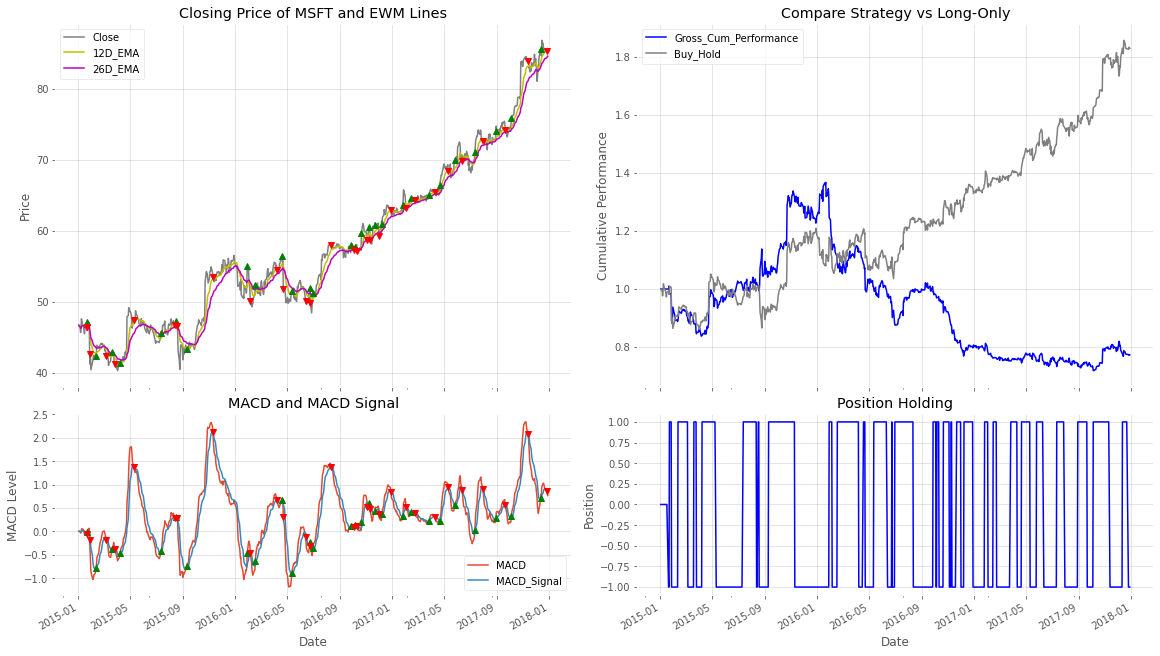



Analyzing MACD Momentum Strategy on AMZN
[*********************100%***********************]  1 of 1 completed


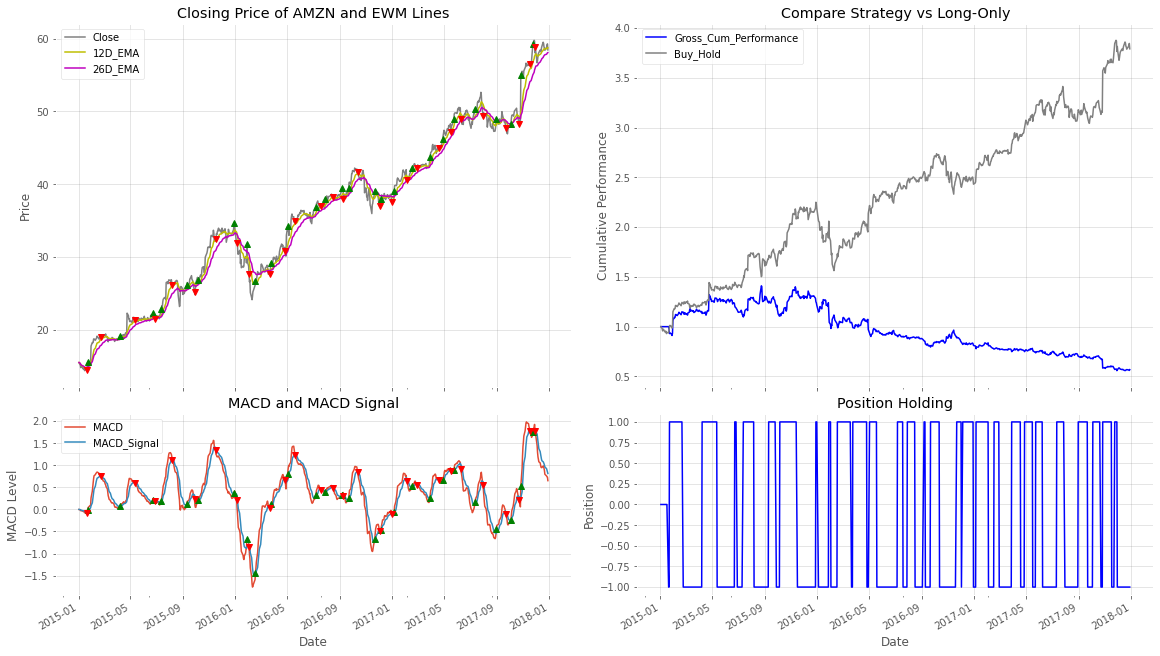



Analyzing MACD Momentum Strategy on UAL
[*********************100%***********************]  1 of 1 completed


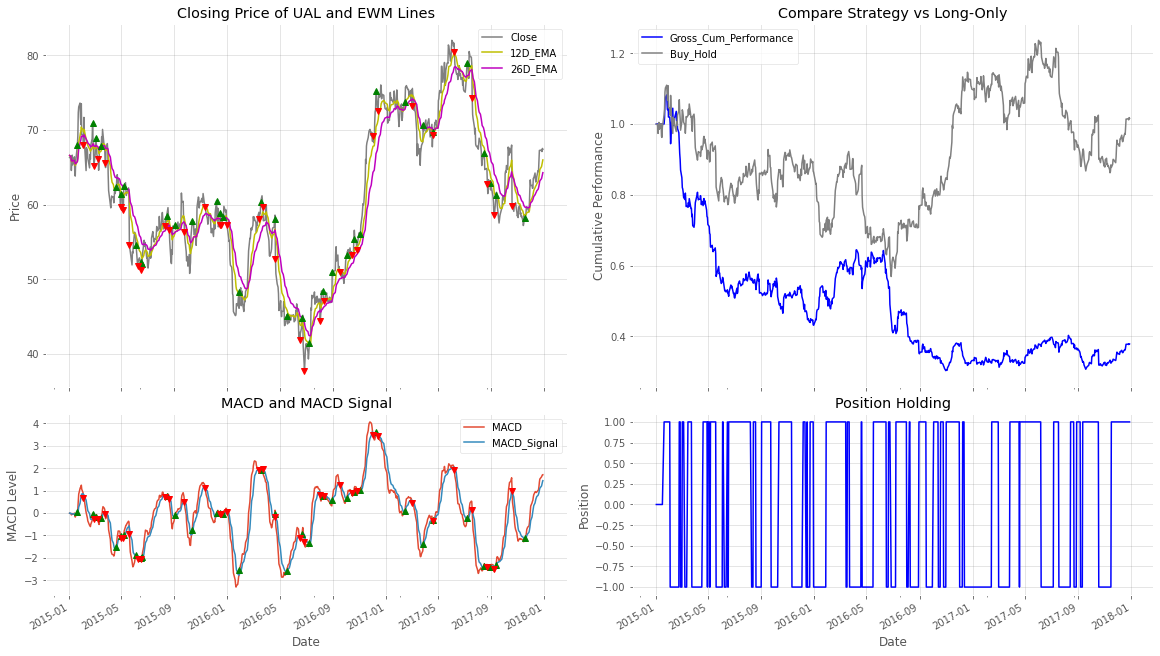



Analyzing MACD Momentum Strategy on DAL
[*********************100%***********************]  1 of 1 completed


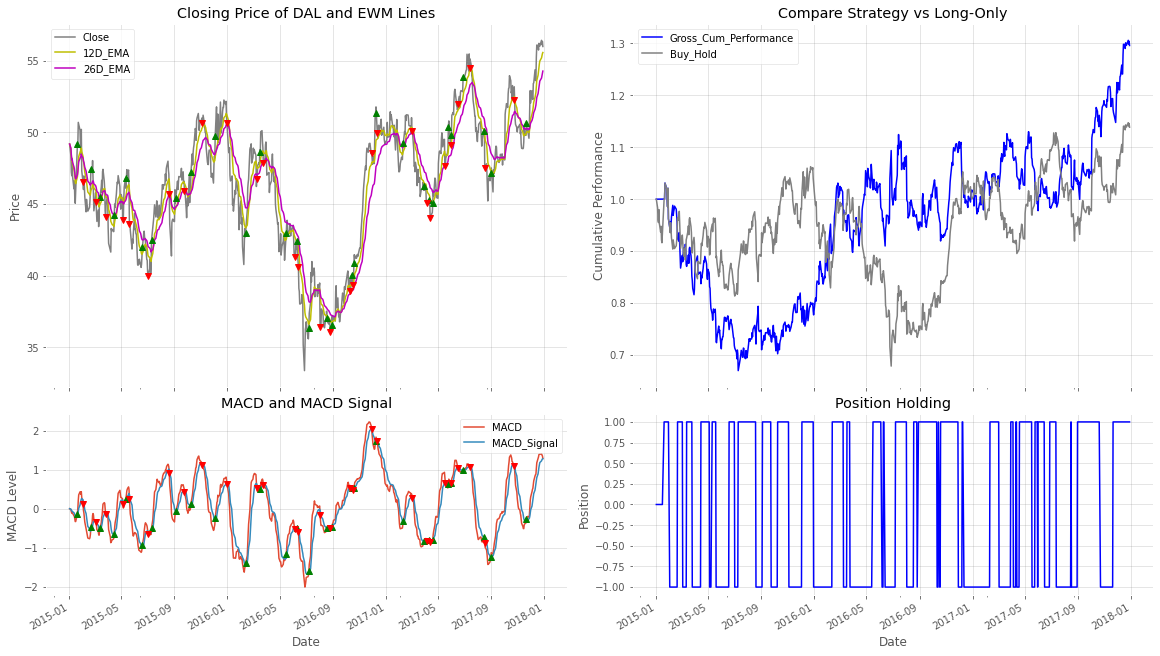



Analyzing MACD Momentum Strategy on XOM
[*********************100%***********************]  1 of 1 completed


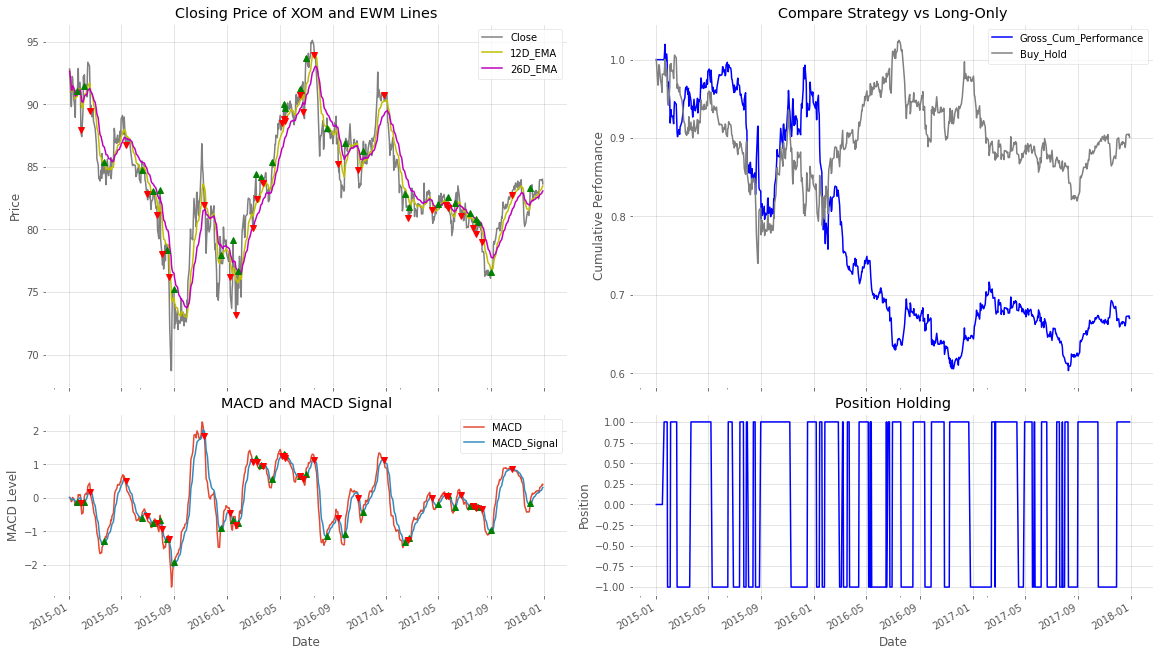



Analyzing MACD Momentum Strategy on CVX
[*********************100%***********************]  1 of 1 completed


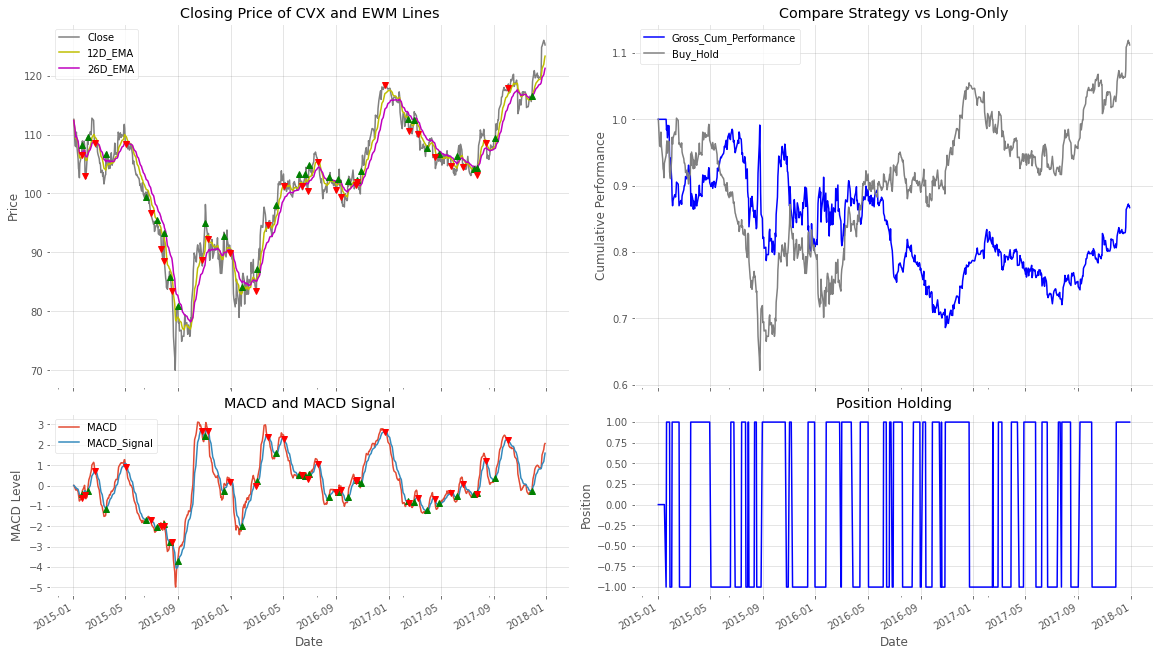

In [16]:
# Instantiate a dictionary to host the generated `MACD_momentum_strategy` objects as a collection
target_tickers = {} # will be a dictionary of `MACD_momentum_strategy` objects

# Instantiate a list of net cumulative performance for each ticker, at the end of the trading period
cumulative_returns = []

for tkr in ['MSFT', 'AMZN', 'UAL', 'DAL', 'XOM', 'CVX']:
    print(f'Analyzing MACD Momentum Strategy on {tkr}')
    
    # Run entire process required for MACD Trading and Performance evaluation
    target_tickers[tkr] = MACD_momentum_strategy(tkr, start, end)
    target_tickers[tkr].set_MACD(fast = 12, slow = 26, signal = 9)
    target_tickers[tkr].run_strategy()
    target_tickers[tkr].plot_strategy()
    target_tickers[tkr].add_transaction_cost(initial_capital = 100000, commission = 5)
    target_tickers[tkr].analyze_drawdown(net = True, plot = False)
    cumulative_returns.append(target_tickers[tkr].df_w_cost['Net_Cum_Performance'].iloc[-1])
    print('\n\n=============================================================')

###  <font color = blue> 👉 Question 7. </font> Which of the six stocks performs the best, based on cumulative returns?

### Below are the lines of code that lead to an answer:

In [17]:
['MSFT', 'AMZN', 'UAL', 'DAL', 'XOM', 'CVX']\
[cumulative_returns
 .index(
     max(cumulative_returns) # identify the index where the max cumulative return 
 )]

'DAL'

### <font color = red> Answer 7 </font>

    The answer is DAL .

###  <font color = blue> 👉 Question 8. </font> Which of the stocks displays the worst max drawdown, based on net drawdown % and the number of days?

### Below are the lines of code that lead to an answer:

In [18]:
# Create a list to host the collection of worst drawdown for each tickers
compare_drawdowns = []

for tkr in ['MSFT', 'AMZN', 'UAL', 'DAL', 'XOM', 'CVX']:
    # Extract the period with the worst drawdown for each ticker
    sub_lst = target_tickers[tkr].drawdowns[['drawdown_period', 'max_drawdown']].iloc[0].values
    # Save extracted into the list
    compare_drawdowns.append({
        'Ticker': tkr,
        'drawdown_period': sub_lst[0],
        'max_drawdown': sub_lst[1]
    })
    
# Convert list of dict into the dataframe for easy visual
pd\
    .DataFrame(compare_drawdowns)\
    .sort_values(by = 'max_drawdown',
                ascending = False)

,Ticker,drawdown_period,max_drawdown
1,AMZN,858 days,0.856514
2,UAL,1068 days,0.784215
0,MSFT,708 days,0.653034
4,XOM,1072 days,0.422204
3,DAL,463 days,0.362710
5,CVX,1078 days,0.317902


### <font color = red> Answer 8 </font>

    The answer is AMZN .

###  <font color = blue> 👉 Question 9. </font> Looking at each of the six stocks’ annual returns, which year for which stocks shows the best performance?

### Below are the lines of code that lead to an answer:

In [19]:
compare_annual_returns = []


for tkr in ['MSFT', 'AMZN', 'UAL', 'DAL', 'XOM', 'CVX']:
    # Iterate through all 6 tickers, to extract the year with the best annual return for each ticker
    annual_returns=[]
    for year in range(2015, 2018):
        # Instantiate a temporary df for each year for the given ticker
        sub_df =\
        (
            target_tickers[tkr]
            .df_w_cost.loc[target_tickers[tkr]
                           .df_w_cost['Net_Cum_Performance'].index.year == year]
        )
        # Extract annual returns
        annual_returns.append\
        ( 
            sub_df['Net_Cum_Performance'].iloc[-1] 
            / sub_df['Net_Cum_Performance'].iloc[0]
            -1
        )
    # Identify the largest annual return in the three years
    max_return = max(annual_returns)
    # Identify the corresponding years (0,1,2 - with reference to 2015)
    year = annual_returns.index(max_return)
    
    # Append information into the list
    compare_annual_returns\
    .append({
        'ticker' : tkr,
        'year' : 2015 + year, # Express `year` in the actual year
        'annual_return' : max_return
    })
    
# Convert list of dict into the dataframe for easy visual  
pd\
    .DataFrame(compare_annual_returns)

,ticker,year,annual_return
0,MSFT,2015,0.248945
1,AMZN,2015,0.215092
2,UAL,2017,0.136319
3,DAL,2017,0.280284
4,XOM,2017,0.038096
5,CVX,2017,0.100676


### <font color = red> Answer 9 </font>

    The answer is __________________________________________ .

###  <font color = blue> 👉 Question 10. </font> Which of the six stocks make the current strategy investment performance? Please rank the seven stocks based on their annualized Sharpe ratio.

### Below are the lines of code that lead to an answer:

In [30]:
compare_sharpe_ratio = []

for tkr in ['MSFT', 'AMZN', 'UAL', 'DAL', 'XOM', 'CVX']:
    # Iterate through the 6 tickers to calculate sharpe.

    avg_return =\
    (
        target_tickers[tkr]
        .df_w_cost['Net_Cum_Performance']
        .pct_change()
        .mean()
    )

    std_return =\
    (
        target_tickers[tkr]
        .df_w_cost['Net_Cum_Performance']
        .pct_change()
        .std()
    )

    sharpe_ratio =\
    (
        np.sqrt(252)
        * avg_return
        / std_return
    )
    
    compare_sharpe_ratio\
        .append({
        'ticker' : tkr,
        'sharpe_ratio' : sharpe_ratio
    })


pd\
    .DataFrame(compare_sharpe_ratio)\
    .set_index('ticker')\
    .rank(ascending=False)

,sharpe_ratio
ticker,
MSFT,3.0
AMZN,4.0
UAL,6.0
DAL,1.0
XOM,5.0
CVX,2.0


### <font color = red> Answer 10 </font>

    MSFT 3
    
    AMZN 4

    UAL  6

    DAL  1

    XOM  5
    
    CVX  2

### <font color="green">"💯 Thank you for putting your efforts into the exercise problem sets 😊"</font>